#### Imports Libraries
***

In [39]:
#-----Standard Import
import numpy as np
import pandas as pd

#-----For Plotting Graphs
import seaborn as sb
import matplotlib.pyplot as plt 
import plotly.express as px

#-----Sklearn modules etc for datas
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek


In [40]:
dData = pd.read_csv('cleaned_data.csv')  #Read From The CSV file

## Visualisation of data after cleaning and observing trends
***
   >This enables us to further understand our data and pick out potential predictors. We want to find the distribution of people with diabetes within our dataset and the different variables leading to the possible different percentages of distribution across the dataset's variables.

#### Distribution of Diabetes
***
 >In this case we chose to do bar graph to show the contrast of the data with 0 signifying non-diabetics and 1 diabetics. We use the module plotly as our visualisation tool, a tool new to us to create a bargraph for improved and more insightful visualisation.

In [ ]:
# Get Count
diabetes_counts = dData['diabetes'].value_counts()

# Create a bar graph
fig = px.bar(x=diabetes_counts.index, y=diabetes_counts.values, text=diabetes_counts.values,
             labels={'x': 'Diabetes Status', 'y': 'Count'}, color=diabetes_counts.index)
fig.update_layout(title='Distribution of Diabetes')

fig.show()

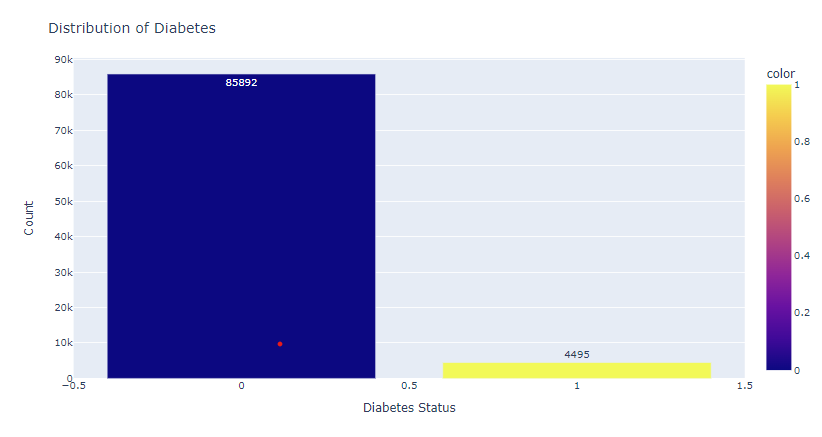

We see that non-diabetics make up 95% of the dataset.

#### Gender vs Diabetes
***
 >We want to find the distribution of diabetes among the genders therefore we used plotly in a similar manner as above. We improved the visualisation by adding the percentages that aid in comparison. We repeat this for the other predictors.

In [ ]:
# calculate counts and percentages
counts = dData.groupby(['gender', 'diabetes']).size().reset_index(name='count')
total_counts = counts['count'].sum()
counts['percentage'] = counts['count'] / total_counts

# create a stacked bar chart with percentage labels
fig = px.bar(counts, x='gender', y='count', color='diabetes', barmode='stack', text=counts['percentage'].apply(lambda x: f'{x:.1%}'))
fig.update_layout(title='Gender vs. Diabetes', xaxis_title='Gender', yaxis_title='Count')

fig.show()

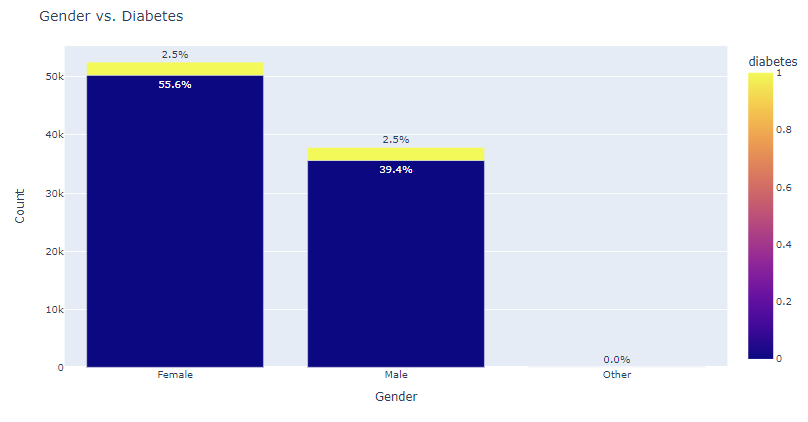

- Observation from this graph:   
    - The data is well-spread out, with majority of the dataset being Female at 58.1% and Male gender at 41.9%.
    
    - We also see that the percentage of Females who are diabetic is 2.5%/58.1% [4.31% of total Females]
    
    - percentage for diabetic Males is 4%/41.9% [5.97% of total Males]. 
    
    - We observe that there DOES NOT exist a significant link between gender and diabetes since the percentage of individuals with diabetes does not difer significantly between genders.
    
    - Hence, we conclude that gender might NOT be a potential indicator

#### Age vs Diabetes
***

In [ ]:
# create a histogram with counts of people with and without diabetes by age
fig = px.histogram(dData, x="age", color="diabetes", nbins=20, 
                   title="Age Distribution by Diabetes Status",
                   labels={"age": "Age", "count": "Count", "color": "Diabetes"})

fig.show()

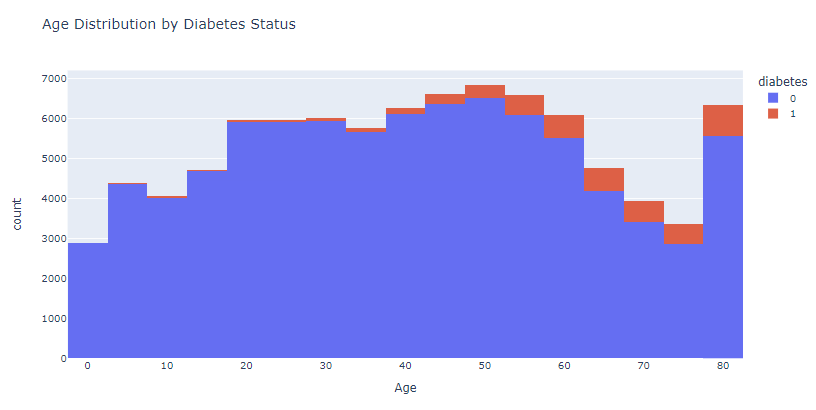

   - We observe that as the age grows, the number of people with diabetes increases as well as the percentage in its respective ranges.

   - Hence, age could be a possible predictor.

#### Hypertension vs Diabetes
***

In [ ]:
# calculate counts and percentages
counts = dData.groupby(['hypertension', 'diabetes']).size().reset_index(name='count')
total_counts = counts['count'].sum()
counts['percentage'] = counts['count'] / total_counts

# pLOT the graph
fig = px.bar(counts, x='hypertension', y='count', color='diabetes', barmode='stack', text=counts['percentage'].apply(lambda x: f'{x:.1%}'))
fig.update_layout(title='Hypertension vs. Diabetes', xaxis_title='Hypertension', yaxis_title='Count')

fig.show()

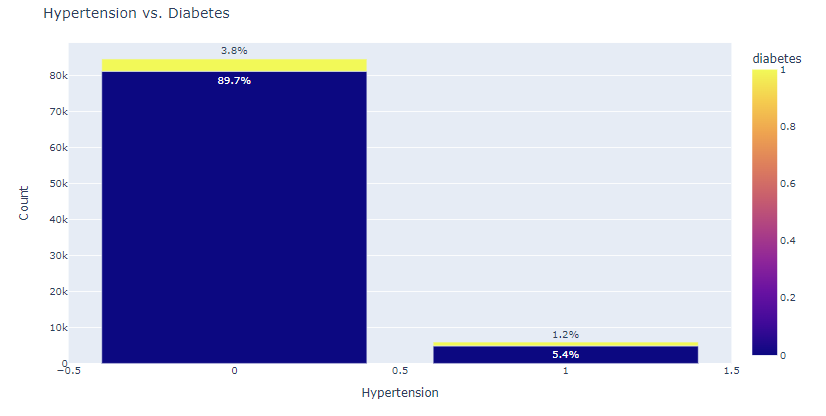

   - We observe that there is a higher percentage of people with diabetes in the group of respondents 

   - Diabetic individuals with hypertension (1.2% out of 6.6%) [15.38%]

   - Diabetic individuals without hypertension (3.8% out of 93.5%) [3.91%] 

   - Hypertension could be a potential predictor for diabetes due to the huge difference in percentage of diabetic individuals.

#### Heart Disease vs Diabetes
***

In [ ]:
# calculate counts and percentages
counts = dData.groupby(['heart_disease', 'diabetes']).size().reset_index(name='count')
total_counts = counts['count'].sum()
counts['percentage'] = counts['count'] / total_counts

# create a stacked bar chart with percentage labels
fig = px.bar(counts, x='heart_disease', y='count', color='diabetes', barmode='stack', text=counts['percentage'].apply(lambda x: f'{x:.1%}'))
fig.update_layout(title='Heart Disease vs. Diabetes', xaxis_title='heart_disease', yaxis_title='Count')

fig.show()

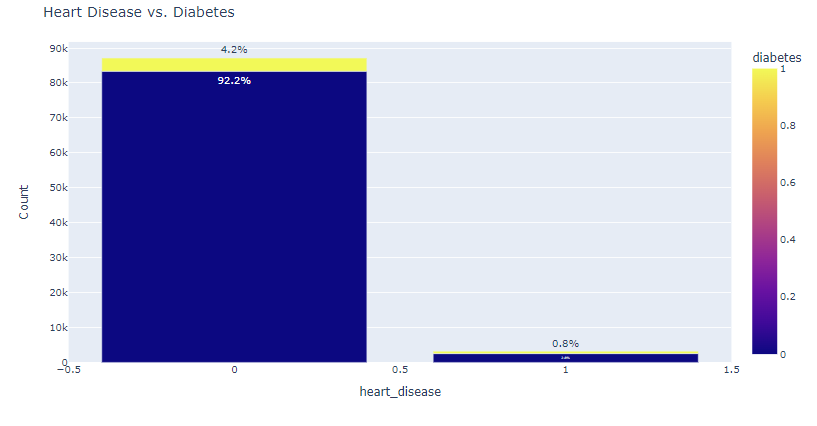


Since people with heart disease have a higher percentage of individuals with diabetes compared to those without heart disease, heart disease might be a potential predictor.

- 0.8% out of 2.8% [22.22%] of people with heart disease have diabetes

 - 4.2% out of 96.6% [4.36%] of people without heart disease have diabetes. 


#### Smoking history vs Diabetes
***

In [ ]:
# create a list of the smoking history categories in the desired order
categories = ['never', 'not current', 'former', 'current',  'ever', 'No Info']

# convert the 'smoking_history' column to a categorical data type with the desired categories and order
dData['smoking_history'] = pd.Categorical(dData['smoking_history'], categories=categories, ordered=True)

# calculate counts and percentages
counts = dData.groupby(['smoking_history', 'diabetes']).size().reset_index(name='count')
total_counts = counts['count'].sum()
counts['percentage'] = counts['count'] / total_counts

# create a stacked bar chart with percentage labels
fig = px.bar(counts, x='smoking_history', y='count', color='diabetes', barmode='stack', text=counts['percentage'].apply(lambda x: f'{x:.1%}'))
fig.update_layout(title='Smoking History vs. Diabetes', xaxis_title='smoking_history', yaxis_title='Count')

fig.show()


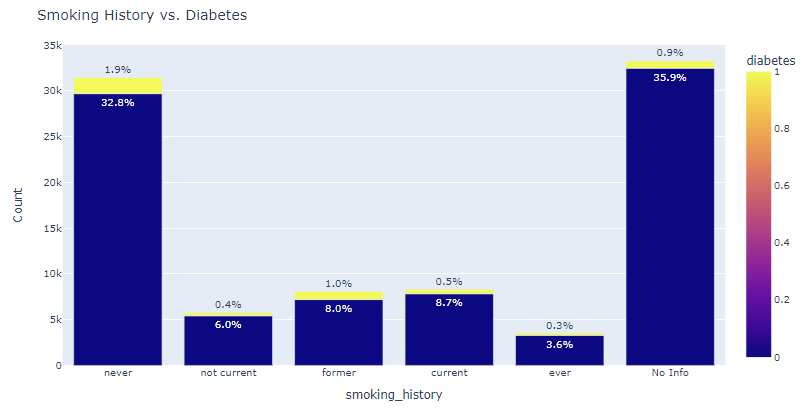

##### Comparing the 6 categories:

> -  Never: The person has never smoked => [5.48%] of total in Never are diabetic
> -  Not Current: The person has never smoked, or has quit smoking more than 12 months ago => [6.25%] of total in Not Current are diabetic
> -  Former: The person used to smoke, but has quit smoking within the last 12 months => [11.11%] of total in Former are diabetic   
> -  Current: The person is currently smoking => [5.43%] of total in Current are diabetic
> -  Ever: The person has smoked at some point in their life, regardless of whether they are currently smoking or not  =>[7.69%] of total in Ever are diabetic
> -  No Info:  There is no information available about the person's smoking history => [2.45%] of total in No Info are diabetic. 
> - Since people who do not have any smoking history have the least percentage of diabetics compared to those that have a smoking history except for people currently smoking, smoking_history has to be carefully examined but is a potential predictor as well.

#### BMI vs Diabetes
***

In [ ]:
# create a histogram with counts of people with and without diabetes by age
fig = px.histogram(dData, x="bmi", color="diabetes", nbins=20, 
                   title="Bmi Distribution by Diabetes Status",
                   labels={"bmi": "Bmi", "count": "Count", "color": "Diabetes"})

fig.show()

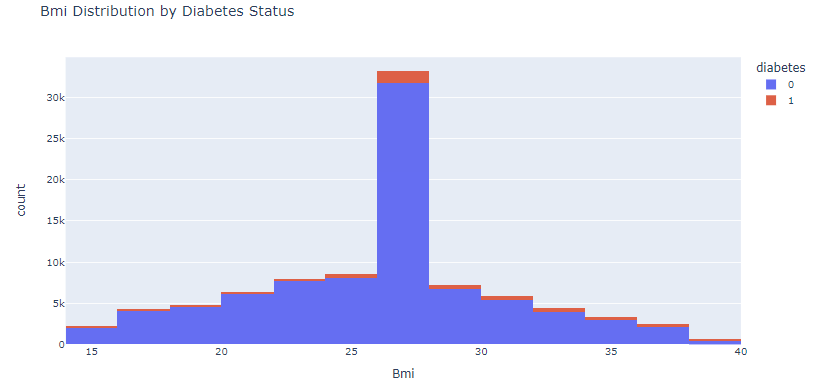

Although there is a significant increase from the number of diabetics from 20 BMI to 30 BMI, there is also a larger sample and hence we need to take a closer look. 

   > From:
   > - 20-21.99 (122/6305 [1.93%])
   > - 22-23.99 (222/7899 [2.81%])
   > - 24-25.99 (379/8444 [4.49%])
   > - 26-27.99 (1427/33107 [4.31%])   
   > - 28-29.99 (525/7151 [7.34%])
   > - 30-31.99 (492/5878 [8.37%])
   > - 32-33.99 (466/4434 [10.51%])
   > - 34-35.99 (402/3284 [12.24%])
   > - 36-37.99 (307/2449 [12.54%])
   > - 38-39.99 (83/509 [16.31%])

We observe that the percentage of diabetics gets higher overall across the graph. 
Hence, BMI is a HIGHLY potential predictor.

#### HbA1c_level vs Diabetes
***

In [ ]:
# create a histogram with counts of people with and without diabetes by age
fig = px.histogram(dData, x="HbA1c_level", color="diabetes", nbins=20, 
                   title="HbA1c_level Distribution by Diabetes Status",
                   labels={"HbA1c_level": "HbA1c_level", "count": "Count", "color": "Diabetes"})

fig.show()

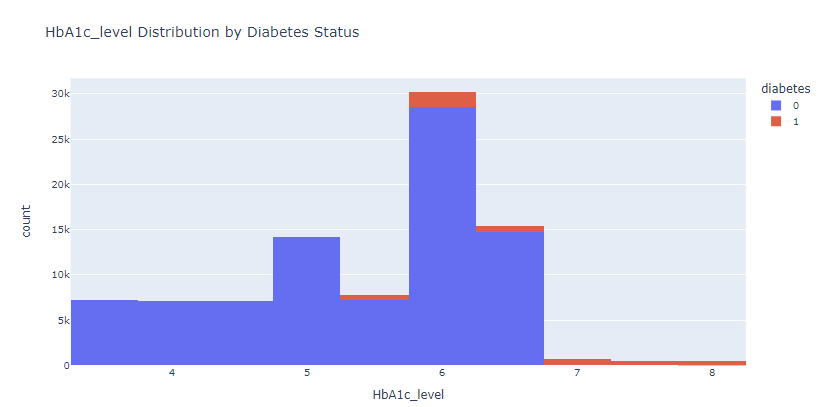

##### HbA1c Level ranges 

   >- Below 5.3 has 0% diabetics 

   >- 5.3-5.7 has 449/7689 [5.84%] diabetics
   
   >- 6 has 1624/30124 [5.39%]
   
   >- 6.3-6.7 has 805/15466 [5.20%]

   >- Levels above 6.7 indicate 100% in diabetics.
   
   >HbA1c level is a HIGHLY potential predictor as the level being lower than 5.3 has 0% diabetics while above 6.7 has 100% diabetics. Additionally, the percentages of diabetics remain consistent with the increasing level of HbA1c.

#### Blood Glucose Level vs Diabetes
***

In [ ]:
# create a histogram with counts of people with and without diabetes by age
fig = px.histogram(dData, x="blood_glucose_level", color="diabetes", nbins=20, 
                   title="Blood Glucose Level Distribution by Diabetes Status",
                   labels={"blood_glucose_level": "blood_glucose_level", "count": "Count", "color": "Diabetes"})


fig.show()

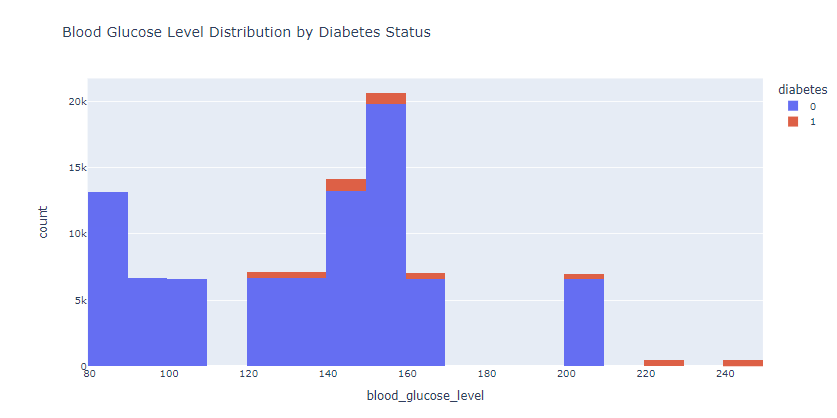

##### The blood glucose levels in the ranges 

   > - Below 120 has 0% diabetics 
   > - 120-139 has 451/7116 [6.34%] diabetics
   > - 140-149 has 892/14148 [6.30%] diabetics
   > - 150-159 has 863/20657 [4.18%] diabetics
   > - 160-169 has 493/7063 [6.98%] diabetics
   > - 170-199 has no data
   > - 200-209 has 455/6995 [6.50%] diabetics
   > - 220-229 has 414/414 [100%] diabetics
   > - 240-249 has 462/462 [100%] diabetics

Although there is a 2% drop in the percentage of diabetics in the 140-149 to 150-159 range, we still observe that there is an overall increase in the percentage of diabetics as the blood glucose level increases
Therefore blood glucose levels remains as a potential predictor.


## C) OverSampling
***
> We noticed that the overall data we have is disproportionate and imbalanced, as 95% of our data sets are non-diabetic while 5% are diabetic. Therefore, we recognise that we need to take some measures to correct this as an imbalanced data will not perform well in predicting the minority class, which in fact is our goal. (To predict whether or not a person may develop diabetes)

> We researched on various ways to overcome this issue and the two ways we decided upon were oversampling and undersampling. We decided to use a mixture of both namely called SMOTETomek algorithm.

> While Oversampling the train data, we chose not to add more data than the ratio of 3:7 to balance our dataset while also keeping as much reliability of the data as possible.

#### Firstly we have to change the categorical form to a numerical form so as to allow SMOTETomek to work

In [42]:
dData['gender_num'] = dData['gender'].map({'Male': 1, 'Female': 0,'Other':2})  # change to numerical

In [43]:
dData['smoking_hist'] = dData['smoking_history'].map({'No Info': 0, 'never': 1,'not current':2,'former':3,'ever':4,'current':5}) 

In [44]:
dData = dData.drop(columns=['gender'])

In [45]:
dData = dData.drop(columns=['smoking_history'])

In [46]:
dData.dtypes

age                    float64
hypertension             int64
heart_disease            int64
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
gender_num               int64
smoking_hist             int64
dtype: object

#### SMOTE + Tomek Implementation
***

In [47]:
# Separate the data into features and target variable
X = dData.drop('diabetes', axis=1)
y = dData['diabetes']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train Before :",X_train.shape)
print("Shope of Y_train Before :",y_train.shape) 

smtom = SMOTETomek(random_state = 43,sampling_strategy={0: int(y_train.value_counts()[0]), 1: int(0.3*y_train.value_counts()[0])})
X_trainresampled,y_trainresampled = smtom.fit_resample(X_train,y_train)

print("Shape of X Train After  :",X_trainresampled.shape)
print("Shope of Y Train Before :",y_trainresampled.shape)

train_resampled_data = pd.concat([X_trainresampled, y_trainresampled], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

Shape of X_train Before : (72309, 8)
Shope of Y_train Before : (72309,)
Shape of X Train After  : (88655, 8)
Shope of Y Train Before : (88655,)


In [48]:
train_resampled_data

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_num,smoking_hist,diabetes
0,46.000000,0,0,23.110000,5.800000,126,0,5,0
1,27.000000,0,0,21.650000,6.000000,159,0,1,0
2,54.000000,0,0,27.320000,6.000000,100,0,0,0
3,29.000000,0,0,25.410000,6.100000,130,1,5,1
4,67.000000,0,0,26.290000,3.500000,126,0,1,0
...,...,...,...,...,...,...,...,...,...
88650,80.000000,0,0,29.059295,6.168482,140,0,2,1
88651,56.276589,0,0,35.219980,6.000000,240,1,2,1
88652,60.841713,0,0,27.305754,6.163315,145,1,0,1
88653,64.872914,0,0,27.649588,6.888960,155,1,3,1


In [49]:
test_data

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_num,smoking_hist,diabetes
5447,46.0,0,0,37.04,4.0,159,0,1,0
14511,20.0,0,0,36.45,6.6,200,0,1,0
75671,51.0,0,0,35.80,4.0,160,1,1,0
5903,60.0,0,0,36.94,4.0,155,1,3,0
49897,66.0,0,0,29.57,8.2,220,0,3,1
...,...,...,...,...,...,...,...,...,...
80258,10.0,0,0,17.60,3.5,140,0,0,0
6884,24.0,0,0,19.30,3.5,90,0,1,0
10968,54.0,0,1,32.04,6.0,160,0,5,0
34085,75.0,1,1,28.07,5.0,140,1,1,0


In [50]:
null_columns = train_resampled_data.columns[train_resampled_data.isnull().any()]
print(train_resampled_data[null_columns].isnull().sum())

Series([], dtype: float64)


In [51]:
train_resampled_data.fillna(0, inplace=True)

In [52]:
train_resampled_data['gender'] = train_resampled_data['gender_num'].map({1:'Male', 0:'Female',2:'Other'})  # change back 
test_data['gender'] = test_data['gender_num'].map({1:'Male', 0:'Female',2:'Other'}) 

In [53]:
train_resampled_data['smoking_history'] = train_resampled_data['smoking_hist'].map({0:'No Info', 1:'never',2:'not current',3:'former',4:'ever',5:'current'}) 
test_data['smoking_history'] = test_data['smoking_hist'].map({0:'No Info', 1:'never',2:'not current',3:'former',4:'ever',5:'current'}) 

In [54]:
train_resampled_data.to_csv('train_resampled_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

### What Happens to the train data after OverSampling
*** 
 > Upon visualising the data once again, we see that the SMOTETomek reduced the imbalance in the dataset. The amount of diabetic data increased while the trend of these diabetic personnel remain the same

#### Diabetes Distribution
***

In [ ]:
diabetes_counts = train_resampled_data['diabetes'].value_counts()

# create a bar graph
fig = px.bar(x=diabetes_counts.index, y=diabetes_counts.values, text=diabetes_counts.values,
             labels={'x': 'Diabetes Status', 'y': 'Count'}, color=diabetes_counts.index)
fig.update_layout(title='Distribution of Diabetes')

fig.show()

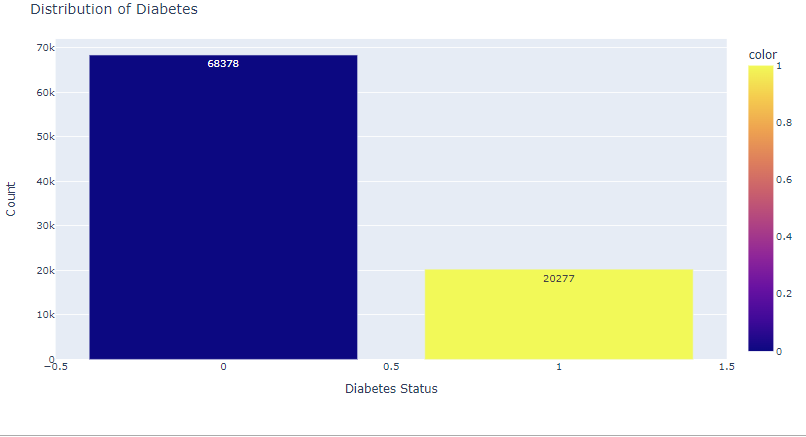

#### Gender Vs Diabetes
***

In [ ]:
# calculate counts and percentages
counts = train_resampled_data.groupby(['gender', 'diabetes']).size().reset_index(name='count')
total_counts = counts['count'].sum()
counts['percentage'] = counts['count'] / total_counts

# create a stacked bar chart with percentage labels
fig = px.bar(counts, x='gender', y='count', color='diabetes', barmode='stack', text=counts['percentage'].apply(lambda x: f'{x:.1%}'))
fig.update_layout(title='Gender vs. Diabetes', xaxis_title='Gender', yaxis_title='Count')

fig.show()

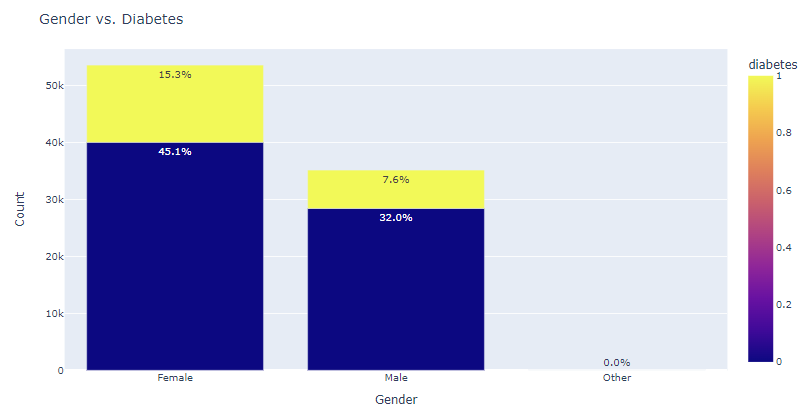

#### Age vs Diabetes
***

In [ ]:
# create a histogram with counts of people with and without diabetes by age
fig = px.histogram(train_resampled_data, x="age", color="diabetes", nbins=20, 
                   title="Age Distribution by Diabetes Status",
                   labels={"age": "Age", "count": "Count", "color": "Diabetes"})


fig.show()

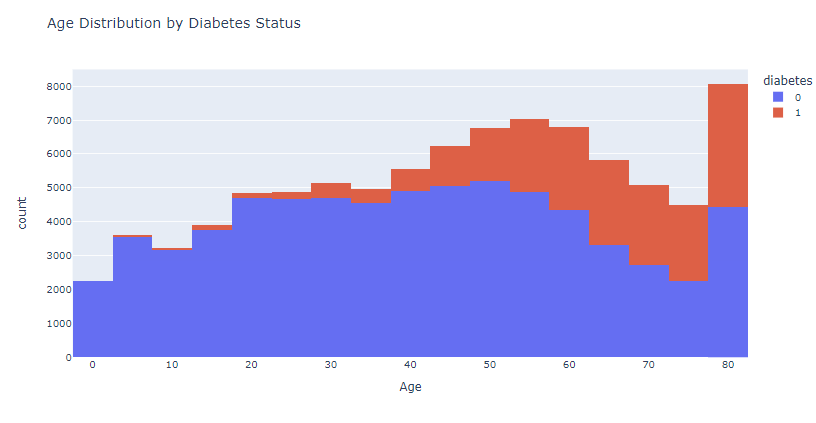

#### Hypertension vs Diabetes
***

In [ ]:
# calculate counts and percentages
counts = train_resampled_data.groupby(['hypertension', 'diabetes']).size().reset_index(name='count')
total_counts = counts['count'].sum()
counts['percentage'] = counts['count'] / total_counts

# create a stacked bar chart with percentage labels
fig = px.bar(counts, x='hypertension', y='count', color='diabetes', barmode='stack', text=counts['percentage'].apply(lambda x: f'{x:.1%}'))
fig.update_layout(title='Hypertension vs. Diabetes', xaxis_title='Hypertension', yaxis_title='Count')


fig.show()

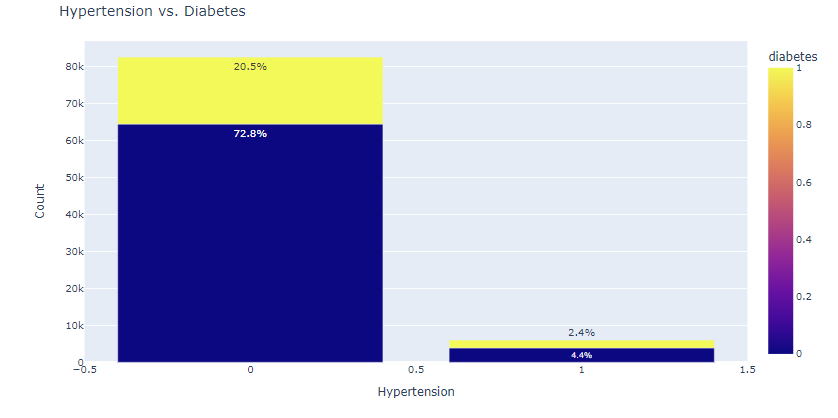

#### Heart Disease vs Diabetes
***

In [ ]:
# calculate counts and percentages
counts = train_resampled_data.groupby(['heart_disease', 'diabetes']).size().reset_index(name='count')
total_counts = counts['count'].sum()
counts['percentage'] = counts['count'] / total_counts

# create a stacked bar chart with percentage labels
fig = px.bar(counts, x='heart_disease', y='count', color='diabetes', barmode='stack', text=counts['percentage'].apply(lambda x: f'{x:.1%}'))
fig.update_layout(title='Heart Disease vs. Diabetes', xaxis_title='heart_disease', yaxis_title='Count')


fig.show()

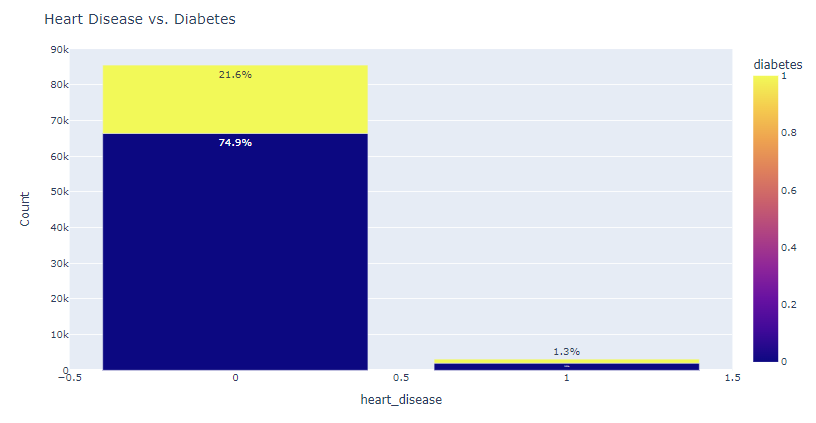

#### Smoking History vs Diabetes
***

In [ ]:
# create a list of the smoking history categories in the desired order
categories = ['never', 'not current', 'former', 'ever',  'current', 'No Info']

# convert the 'smoking_history' column to a categorical data type with the desired categories and order
train_resampled_data['smoking_history'] = pd.Categorical(train_resampled_data['smoking_history'], categories=categories, ordered=True)

# calculate counts and percentages
counts = train_resampled_data.groupby(['smoking_history', 'diabetes']).size().reset_index(name='count')
total_counts = counts['count'].sum()
counts['percentage'] = counts['count'] / total_counts

# create a stacked bar chart with percentage labels
fig = px.bar(counts, x='smoking_history', y='count', color='diabetes', barmode='stack', text=counts['percentage'].apply(lambda x: f'{x:.1%}'))

# set the title and axis labels
fig.update_layout(title='Smoking History vs. Diabetes', xaxis_title='smoking_history', yaxis_title='Count')


fig.show()


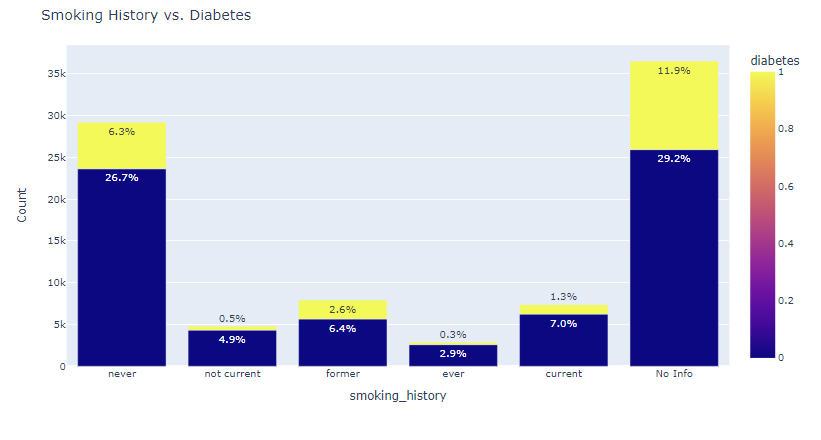

#### BMI vs Diabetes
***

In [ ]:
# create a histogram with counts of people with and without diabetes by age
fig = px.histogram(train_resampled_data, x="bmi", color="diabetes", nbins=20, 
                   title="Bmi Distribution by Diabetes Status",
                   labels={"bmi": "Bmi", "count": "Count", "color": "Diabetes"})


fig.show()

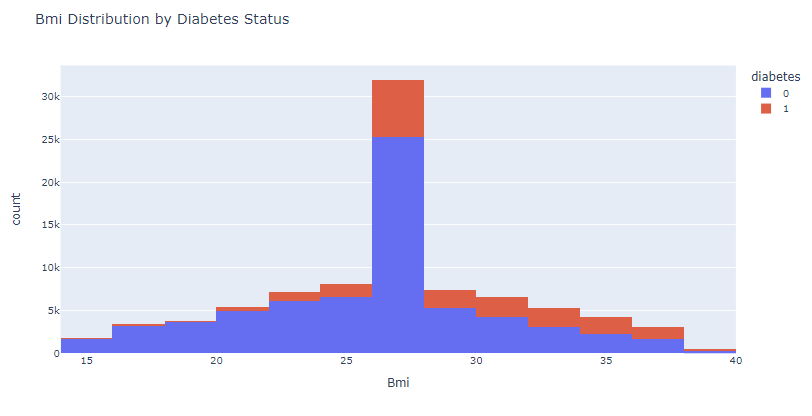

#### HbA1c level vs Diabetes
***

In [ ]:
# create a histogram with counts of people with and without diabetes by age
fig = px.histogram(train_resampled_data, x="HbA1c_level", color="diabetes", nbins=20, 
                   title="HbA1c_level Distribution by Diabetes Status",
                   labels={"HbA1c_level": "HbA1c_level", "count": "Count", "color": "Diabetes"})


fig.show()

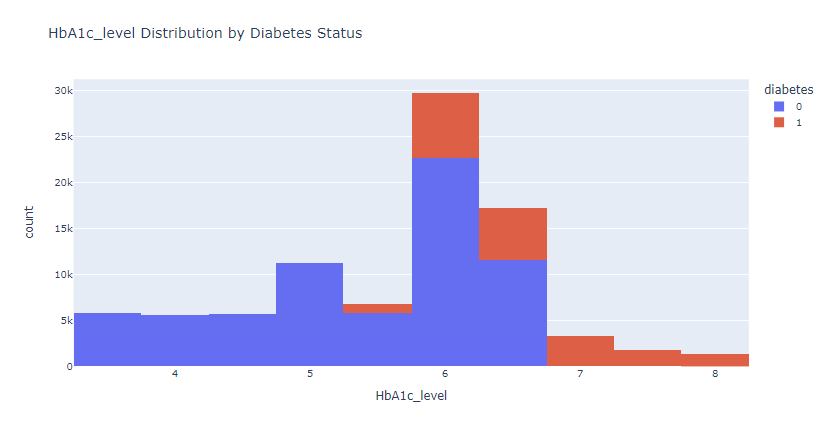

#### Blood Glucose Level vs Diabetes
***

In [ ]:
# create a histogram with counts of people with and without diabetes by age
fig = px.histogram(train_resampled_data, x="blood_glucose_level", color="diabetes", nbins=20, 
                   title="Blood Glucose Level Distribution by Diabetes Status",
                   labels={"blood_glucose_level": "blood_glucose_level", "count": "Count", "color": "Diabetes"})

# show the plot
fig.show()

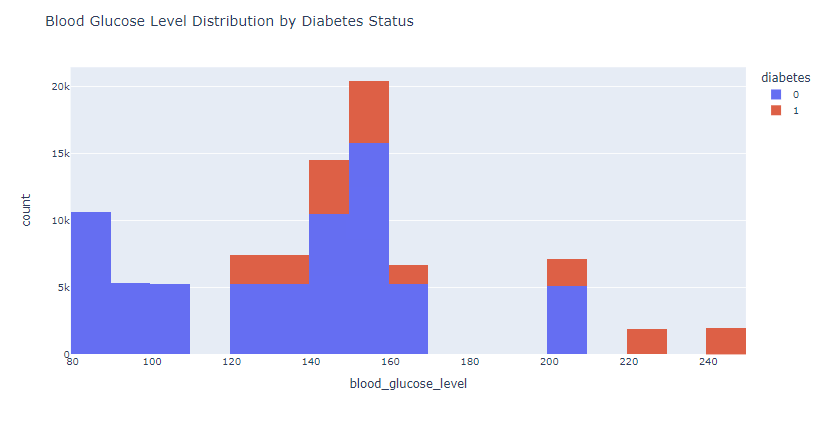

#### Correlation of Trained Data After OverSampling Method
***
 > As observed the top 3 variables with the highest correlation would be the HbA1c Level(0.48), followed by Age (0.40) and then Blood Glucose Level (0.38)

Pearson's correlation coefficients:
 age                    0.399223
hypertension           0.081800
heart_disease          0.059614
bmi                    0.276905
HbA1c_level            0.476294
blood_glucose_level    0.383878
gender_num            -0.071593
smoking_hist           0.081294
diabetes               1.000000
Name: diabetes, dtype: float64

Spearman's correlation coefficients:
 age                    0.405342
hypertension           0.081800
heart_disease          0.059614
bmi                    0.267784
HbA1c_level            0.478931
blood_glucose_level    0.312678
gender_num            -0.071534
smoking_hist           0.123319
diabetes               1.000000
Name: diabetes, dtype: float64


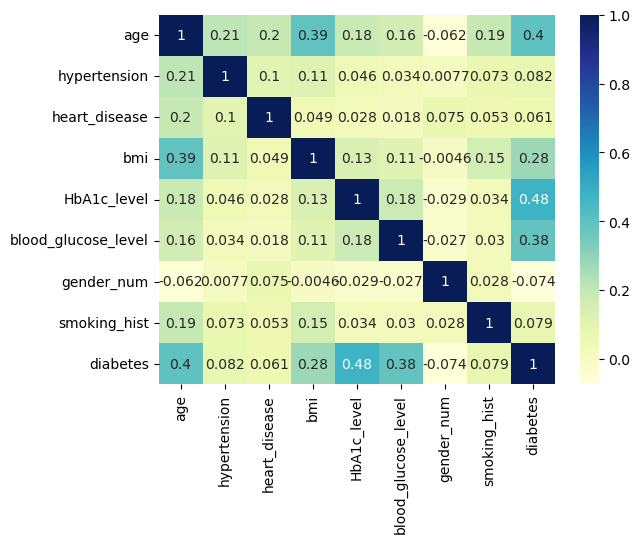

In [56]:
# Separate the data into two groups based on the value of the target variable
diabetes_group = train_resampled_data[train_resampled_data['diabetes'] == 1]
no_diabetes_group = train_resampled_data[train_resampled_data['diabetes'] == 0]

# Split each group into training and testing sets using stratified sampling
diabetes_train, diabetes_test = train_test_split(diabetes_group, test_size=0.2, random_state=42)
no_diabetes_train, no_diabetes_test = train_test_split(no_diabetes_group, test_size=0.2, random_state=42)

# Combine the training and testing sets for both groups
train_data = pd.concat([diabetes_train, no_diabetes_train])
test_data = pd.concat([diabetes_test, no_diabetes_test])

# Split the data into features and target variable
X_train = train_data.drop('diabetes', axis=1)
y_train = train_data['diabetes']
X_test = test_data.drop('diabetes', axis=1)
y_test = test_data['diabetes']

# Concatenate the target variable column to the feature matrix for the training set
train_data_with_target = pd.concat([X_train, y_train], axis=1)

# Calculate the correlation matrix
correlation_matrix = train_data_with_target.corr(numeric_only=True)

# Plot the correlation matrix
sb.heatmap(correlation_matrix, annot=True, cmap='YlGnBu')

# Methods of correlation
pearson_corr = train_resampled_data.corr(method='pearson', numeric_only=True)['diabetes']
spearman_corr = train_resampled_data.corr(method='spearman', numeric_only=True)['diabetes']

print("Pearson's correlation coefficients:\n", pearson_corr)
print("\nSpearman's correlation coefficients:\n", spearman_corr)